In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import numpy as np

from sklearn.linear_model import RidgeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
PATH = "data/foo.csv"
TEST_SIZE = 0.3
RANDOM_SEED = 42

<Axes: xlabel='x', ylabel='y'>

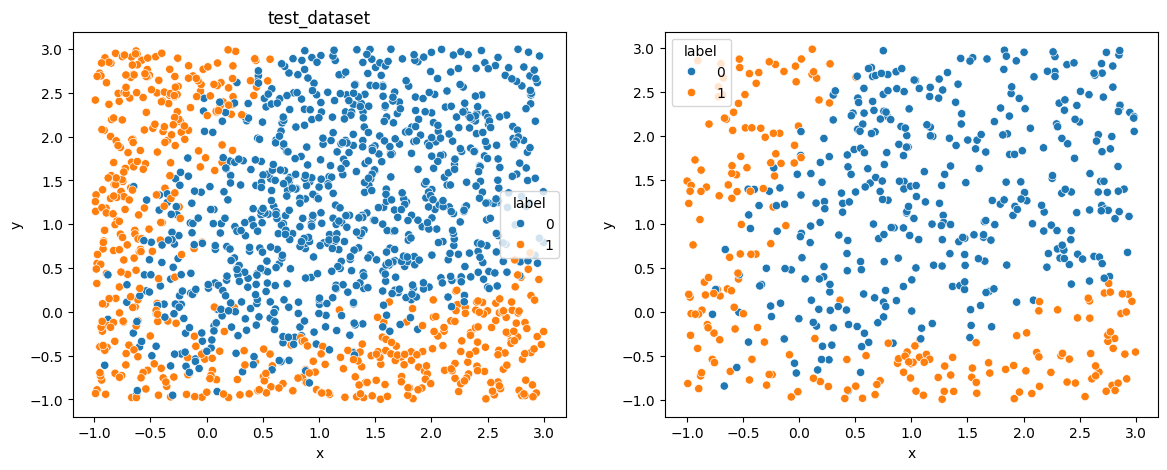

In [3]:
df = pd.read_csv(PATH)
df_train, df_test = train_test_split(
    df,
    test_size=TEST_SIZE,
    random_state=RANDOM_SEED,
)
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

df_train.to_csv("data/foo-train.csv", index=False)
df_test.to_csv("data/foo-test.csv", index=False)

ax[0].set_title("train_dataset")
sns.scatterplot(df_train, x="x", y="y", hue="label", ax=ax[0])

ax[0].set_title("test_dataset")
sns.scatterplot(df_test, x="x", y="y", hue="label", ax=ax[1])

              precision    recall  f1-score   support

           0       0.75      0.82      0.78       377
           1       0.62      0.52      0.56       213

    accuracy                           0.71       590
   macro avg       0.69      0.67      0.67       590
weighted avg       0.70      0.71      0.71       590



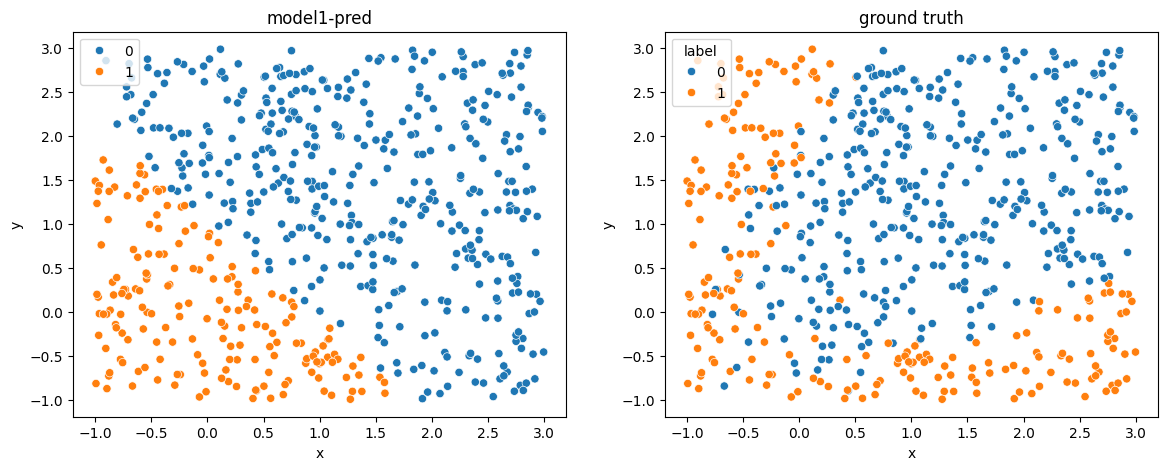

In [4]:
model_1 = RidgeClassifier()
model_1.fit(df_train.drop("label", axis=1), df_train["label"])

y_pred_model_1 = model_1.predict(df_test.drop("label", axis=1))

fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].set_title("model1-pred")
sns.scatterplot(x=df_test["x"], y=df_test["y"], hue=y_pred_model_1, ax=ax[0])

ax[1].set_title("ground truth")
sns.scatterplot(x=df_test["x"], y=df_test["y"], hue=df_test["label"], ax=ax[1])

print(classification_report(y_true=df_test["label"], y_pred=y_pred_model_1))

<Axes: xlabel='x', ylabel='y'>

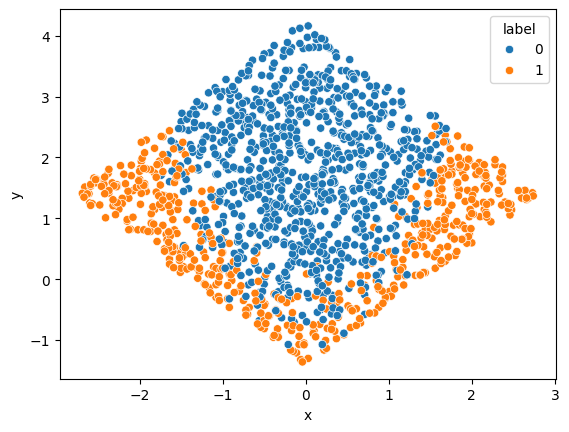

In [5]:
FI = 1 / 4 * np.pi


def mod_df(df_arg: pd.DataFrame) -> pd.DataFrame:
    xx = np.cos(FI) * df_arg["x"] - np.sin(FI) * df_arg["y"]
    yy = np.sin(FI) * df_arg["x"] + np.cos(FI) * df_arg["y"]

    return pd.DataFrame(
        {
            "x": np.nan_to_num(xx),
            "xx": np.nan_to_num(xx**2),
            "y": np.nan_to_num(yy),
            "label": df_arg["label"],
        }
    )


df_train_moded = mod_df(df_train)
df_test_moded = mod_df(df_test)

sns.scatterplot(
    df_train_moded,
    x="x",
    y="y",
    hue=df_train["label"],
)

<Axes: title={'center': 'ground truth'}, xlabel='x', ylabel='y'>

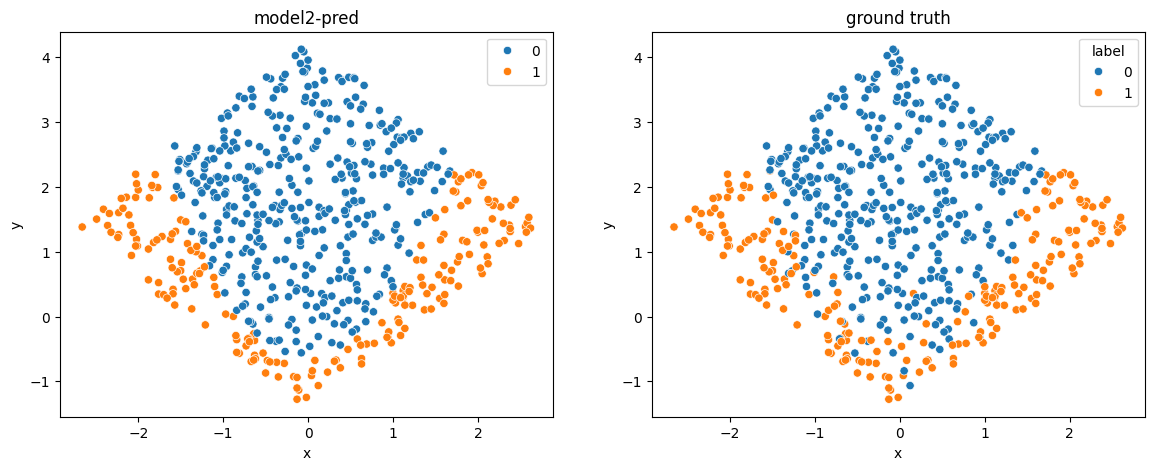

In [6]:
model_2 = RidgeClassifier()
model_2.fit(
    df_train_moded.drop(
        "label",
        axis=1,
    ),
    df_train_moded["label"],
)

y_pred_model_2 = model_2.predict(
    df_test_moded.drop(
        "label",
        axis=1,
    )
)


fig, ax = plt.subplots(1, 2, figsize=(14, 5))
ax[0].set_title("model2-pred")
sns.scatterplot(x=df_test_moded["x"], y=df_test_moded["y"], hue=y_pred_model_2, ax=ax[0])

ax[1].set_title("ground truth")
sns.scatterplot(x=df_test_moded["x"], y=df_test_moded["y"], hue=df_test_moded["label"], ax=ax[1])

In [7]:
print(
    pd.DataFrame(
        classification_report(
            y_true=df_test_moded["label"],
            y_pred=y_pred_model_2,
            output_dict=True,
        )
    )
    .transpose()
    .to_markdown()
)

|              |   precision |   recall |   f1-score |    support |
|:-------------|------------:|---------:|-----------:|-----------:|
| 0            |    0.927835 | 0.954907 |   0.941176 | 377        |
| 1            |    0.915842 | 0.868545 |   0.891566 | 213        |
| accuracy     |    0.923729 | 0.923729 |   0.923729 |   0.923729 |
| macro avg    |    0.921838 | 0.911726 |   0.916371 | 590        |
| weighted avg |    0.923505 | 0.923729 |   0.923266 | 590        |
